## Testing model against simulated data

In [15]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="To make the code visible click here"></form>''')

In [30]:
%%bash 
grep 'mat' ./p-val_test/res_sim_uneq | cut -f 2 -d " " > ./p-val_test/test_uneq

In [29]:
%%bash 
grep "mat" ./p-val_test/res_sim_eq | cut -f 2 -d " " > ./p-val_test/test_eq

In [10]:
import matplotlib as mpl
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import pandas as pd
import numpy as np
import math

/home/nina/.venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


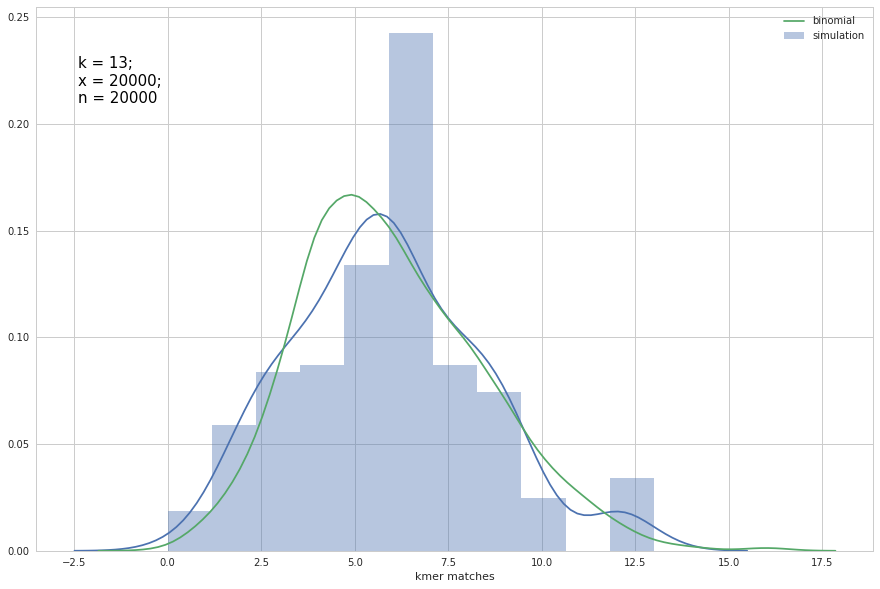

In [52]:
#k-mer size
k = 13 
#Length of genome X
x = 20000 
# query length = number of trials
n = 20000   
#probability of each trial = probability of specific k-mer being present in genome X
p = float(1) - math.pow((1-(1/math.pow(4,k))),x) 


#we model the probability of having m matches between the query and the genome
s = np.random.binomial(n, p, 1000)

#read simulated number of matches
sum_file = "./p-val_test/test_eq"
df = pd.read_csv(sum_file,header=None,sep='\t')

fig, ax = plt.subplots(figsize=(15,10))

#plotting
sns.distplot(df[0], axlabel='kmer matches',label="simulation")
sns.distplot(s, label="binomial", hist=False)

ax.text(0.05, 0.91, 'k = '+str(k)+'\nx = '+str(x)+'\nn = '+str(n),
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=15)

plt.legend()
plt.show()


/home/nina/.venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


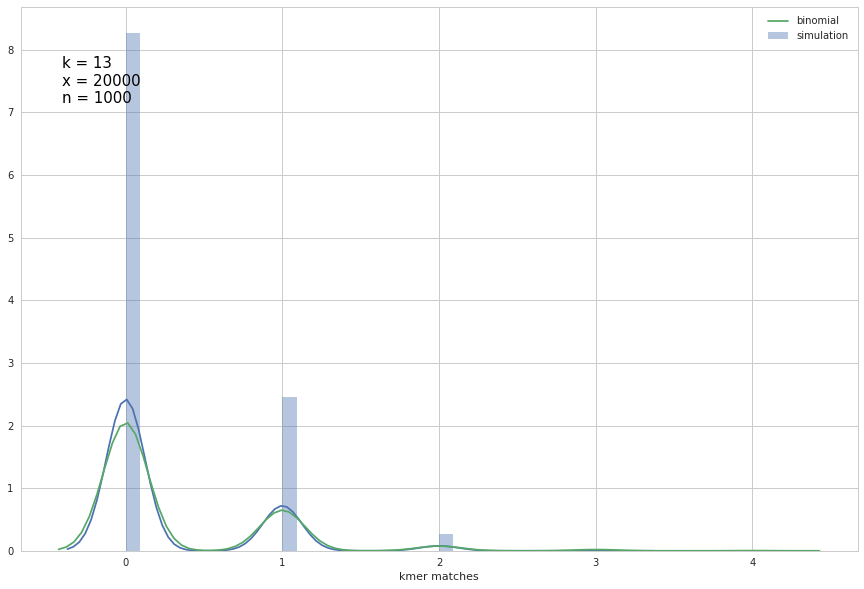

In [53]:
#k-mer size
k = 13 
#Length of genome X
x = 20000 
# query length = number of trials
n = 1000   
#probability of each trial = probability of specific k-mer being present in genome X
p = float(1) - math.pow((1-(1/math.pow(4,k))),x) 


#we model the probability of having m matches between the query and the genome
s = np.random.binomial(n, p, 1000)

#read simulated number of matches
sum_file = "./p-val_test/test_uneq"
df = pd.read_csv(sum_file,header=None,sep='\t')

fig, ax = plt.subplots(figsize=(15,10))

#plotting
sns.distplot(df[0], axlabel='kmer matches',label="simulation")
sns.distplot(s, label="binomial", hist=False)

ax.text(0.05, 0.91, 'k = '+str(k)+'\nx = '+str(x)+'\nn = '+str(n),
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=15)

plt.legend()
plt.show()